**Step 1: Imports and Reading Data**

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
data = pd.read_csv('../data/suicide_life_df.csv')
data.head()

,Country,gdpPerCapita,suicideRate,lifeExpectancyMen,lifeExpectancyWomen,happinessScore,fertilityRate
0,Afghanistan,1105.0,20.6,60.6,68.2,3.794,4.7
1,Albania,4932.0,32.4,74.8,81.3,4.959,1.7
2,Algeria,4534.0,15.6,73.3,78.9,5.605,2.9
3,Andorra,46622.0,18.9,81.7,84.8,6.955,1.4
4,Angola,2077.0,20.5,58.1,65.6,4.105,5.3


**Step 2: Descriptive Statistics**

In [4]:
data.shape

(136, 7)

In [6]:
# Viewing datatypes for each column as well as null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              136 non-null    object 
 1   gdpPerCapita         136 non-null    float64
 2   suicideRate          136 non-null    float64
 3   lifeExpectancyMen    136 non-null    float64
 4   lifeExpectancyWomen  136 non-null    float64
 5   happinessScore       136 non-null    float64
 6   fertilityRate        136 non-null    float64
dtypes: float64(6), object(1)
memory usage: 7.6+ KB


In [7]:
data.describe().T # describe and transpose the matrix for better view

,count,mean,std,min,25%,50%,75%,max
gdpPerCapita,136.0,15499.544118,21300.999430,463.000,2274.750,5811.5000,19373.25000,118287.000
suicideRate,136.0,15.933088,5.415725,9.600,12.500,14.4000,18.22500,39.700
lifeExpectancyMen,136.0,72.016176,6.744416,52.900,66.775,73.5500,76.40000,84.000
lifeExpectancyWomen,136.0,76.925735,6.248140,55.600,72.075,78.3500,81.35000,89.500
happinessScore,136.0,5.580684,1.067894,3.351,4.739,5.5835,6.39225,7.769
fertilityRate,136.0,2.762500,1.384568,1.300,1.700,2.2500,3.40000,7.600


In [8]:
# interpret descibe matrix

-  We have seen **Max > Mean & Median** in some of the continuous variables so we can datermine the **Outliers**
-  We can parse through the min and max values of columns to detect any improbable values. We can conclude that **no improbabale values are present**

In [12]:
# describe categorical columns

np.object = object

data.describe(include=np.object).T

,count,unique,top,freq
Country,136,136,Afghanistan,1


-  Country is the only categorical field present and it is a unique column

Text(0.5, 0, 'GDP Per Capita')

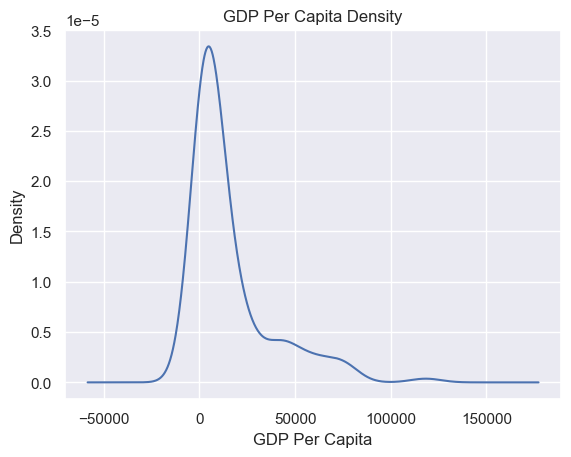

In [13]:
#lets find out the top 10 GDP per capita

ax=data['gdpPerCapita'].plot(kind='kde',title='GDP Per Capita Density')
ax.set_xlabel('GDP Per Capita')

**Step 3: Feature Relationships**

<Axes: xlabel='gdpPerCapita', ylabel='suicideRate'>

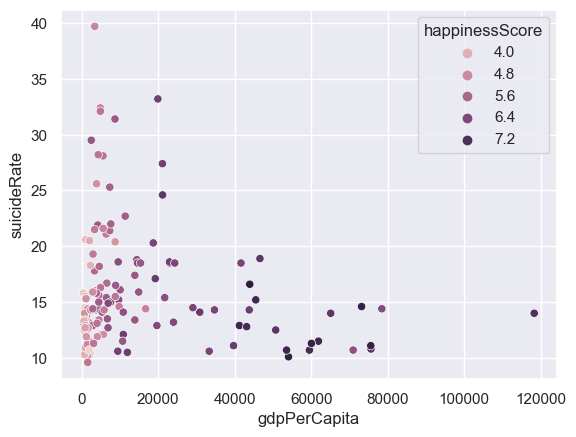

In [14]:
# Relationship between gdpPerCapita and suicideRate using scatterplot graph

sns.scatterplot(x='gdpPerCapita', y='suicideRate',hue='happinessScore', data=data)

**Note:** Suicide Rate is high with low GDP/Capita and low Happiness Score

C:\Users\got1p\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


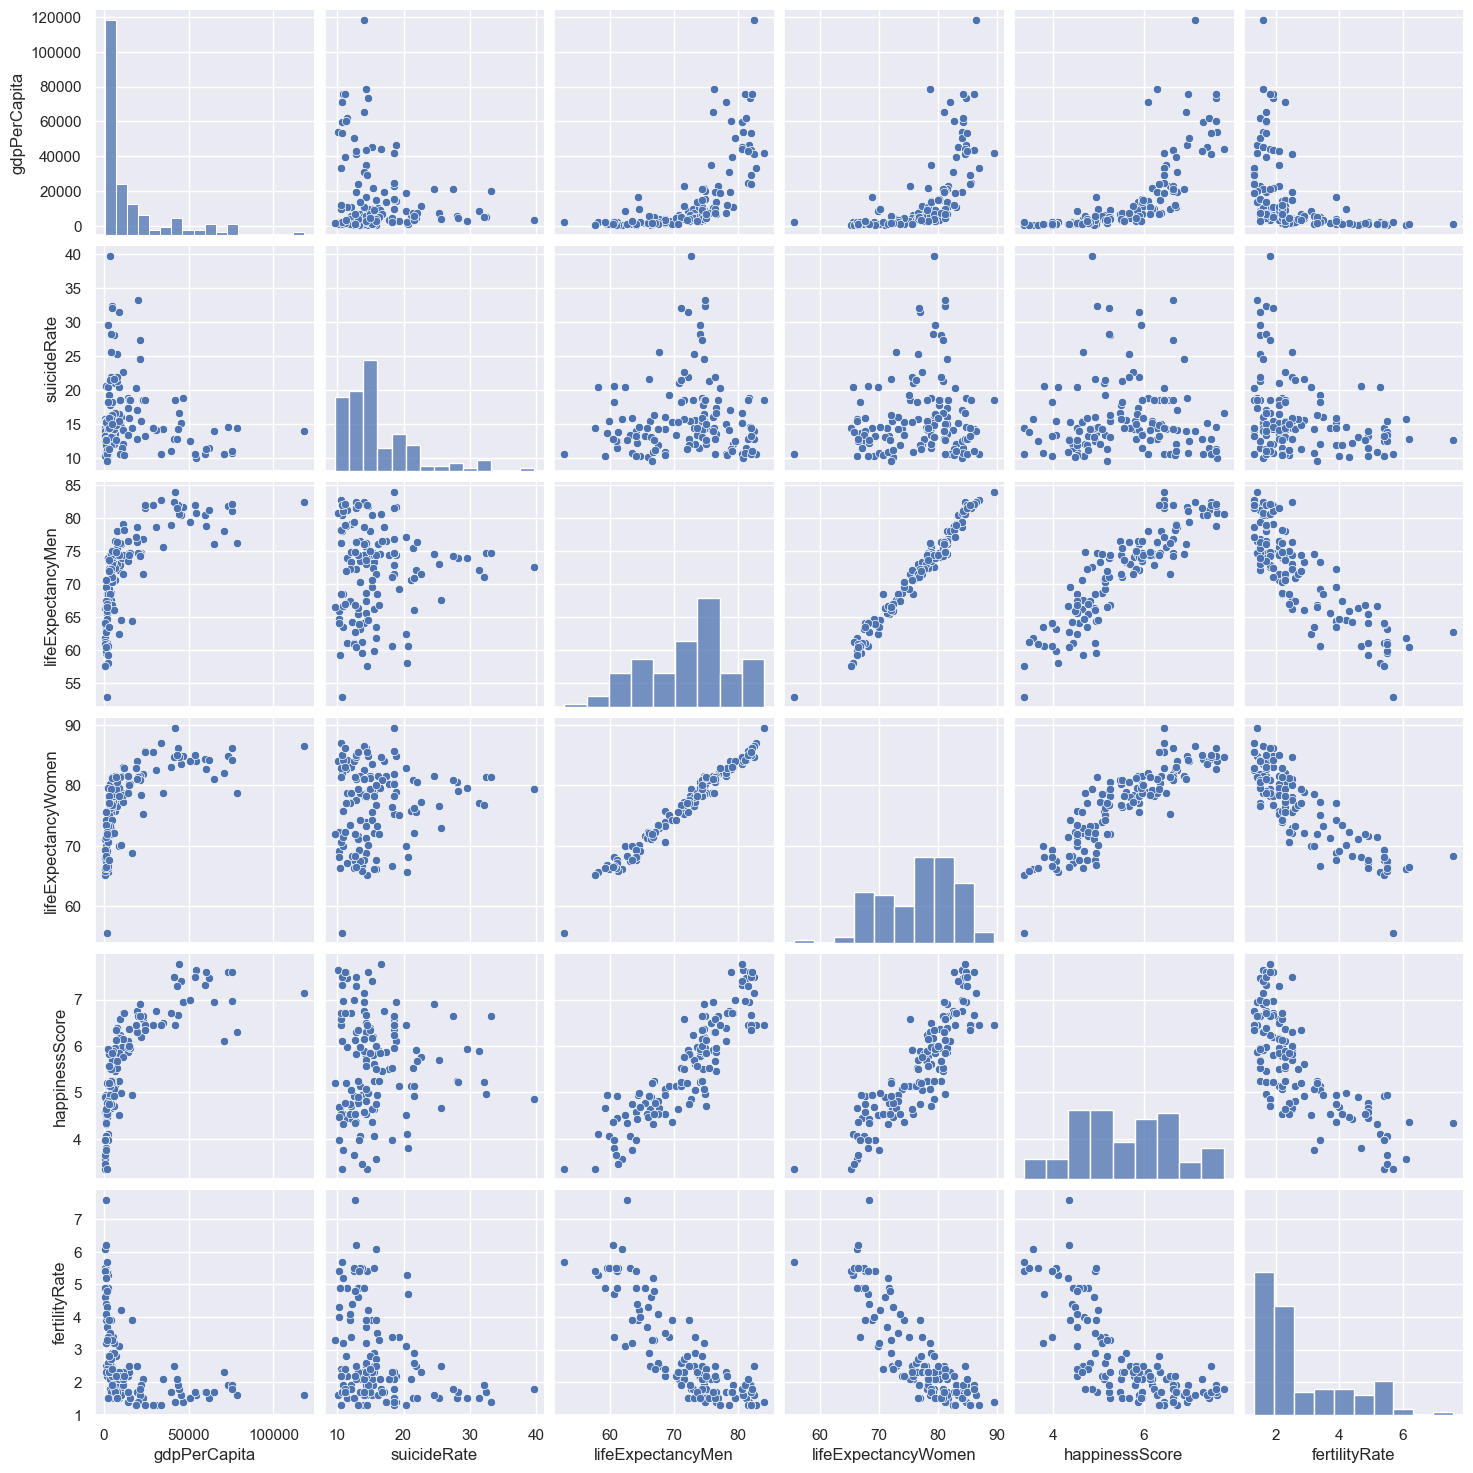

In [15]:
#lets compare all the variables
sns.pairplot(data)
plt.show()

**The above pairplot shows that most of the variables have significant correlations**

In [20]:
#Calculating the correlation cofficients
col = "Country"
data1 = data.loc[:, data.columns != col]
corr=data1.corr()
corr

,gdpPerCapita,suicideRate,lifeExpectancyMen,lifeExpectancyWomen,happinessScore,fertilityRate
gdpPerCapita,1.000000,-0.162542,0.657151,0.617371,0.737103,-0.456170
suicideRate,-0.162542,1.000000,0.049705,0.115879,0.006087,-0.297950
lifeExpectancyMen,0.657151,0.049705,1.000000,0.986378,0.892401,-0.843028
lifeExpectancyWomen,0.617371,0.115879,0.986378,1.000000,0.879021,-0.855651
happinessScore,0.737103,0.006087,0.892401,0.879021,1.000000,-0.753666
fertilityRate,-0.456170,-0.297950,-0.843028,-0.855651,-0.753666,1.000000


**We can see that most of the correlation coefficients are close to 1 and -1. Those variables have good correlation.**

<Axes: >

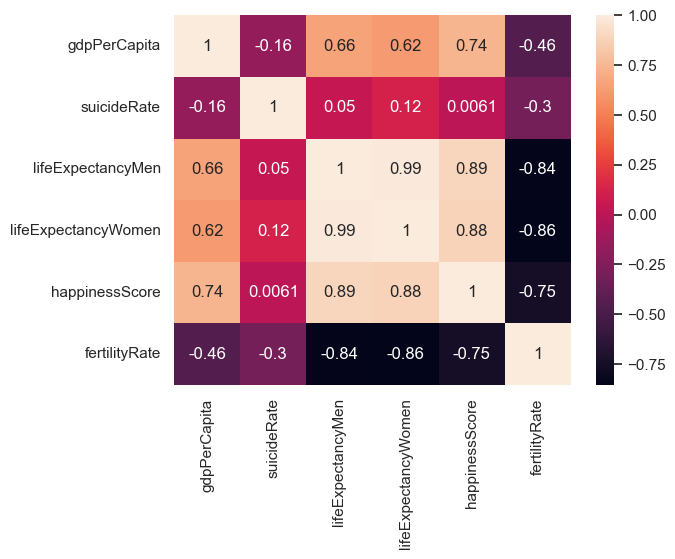

In [21]:
#lets test this with heat map
sns.heatmap(corr,annot=True)

**We got the same results**

**Step 4: Box Plot**

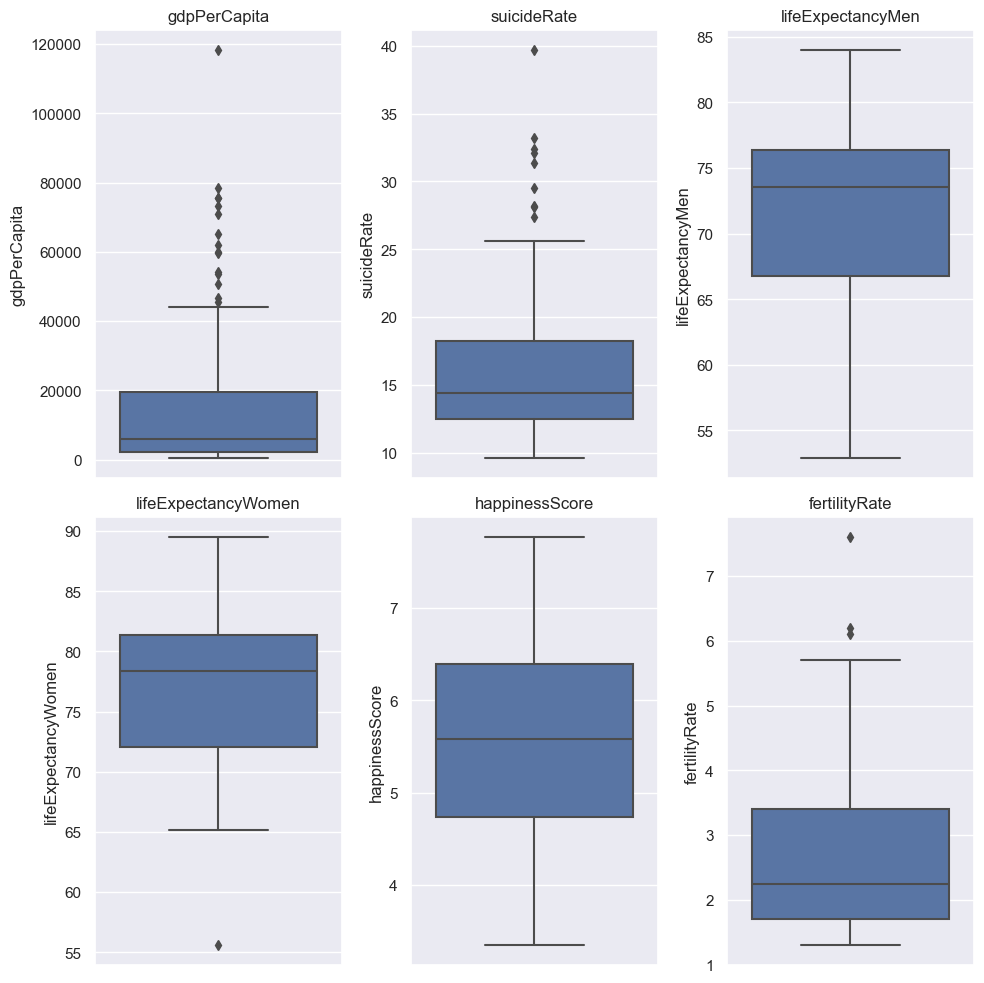

In [22]:
fig = plt.figure(figsize=(10,10))

for i in range(len(data1.columns)):
    
    plt.subplot(2,3,i+1)
    plt.title(data1.columns[i])
    sns.boxplot(data=data1,y=data1[data1.columns[i]])

plt.tight_layout()
plt.show()

**Note:** From the above graph we could clearly detect the outliers but by deeply studying the values of these points, we find that these are not the outliers but some realistic data that represents special cases. Therefore we would like to keep these.

**Step 4:** Lets find the answers to some questions

-  Question 1:- What are the top 10 countries having high suicide rate?